### Support Vector Machine (SVM) - Label Classification

In [1]:
import sys
sys.path.append('../../')

# Import libraries
from utils.load import load
from utils.score import fold_cross_validate, visualize_classification_result, visualize_feature_importance
from utils.print import print_cross_validation_scores, print_scores
from constant.columns import FEATURES, LABEL

import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [2]:
# Import data
df = pd.read_csv('./source/dataset.csv')
X, y = df[FEATURES], df[LABEL]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#### Find the best parameter to build the model with the best accuracy.

In [3]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.1, 1, 10, 100, 1000]}]

# Use 'f1_macro' as the scoring method
clf_c = GridSearchCV(svm.SVC(), tuned_parameters, scoring='f1_macro')

clf_c.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf_c.best_params_)

print("Grid scores on development set:")
means = clf_c.cv_results_['mean_test_score']
stds = clf_c.cv_results_['std_test_score']
for _mean, _std, _params in zip(means, stds, clf_c.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (_mean, _std * 2, _params))

print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, clf_c.predict(X_test)
print(classification_report(y_true, y_pred))

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metr

Best parameters set found on development set:
{'C': 1000}
Grid scores on development set:
0.485 (+/-0.000) for {'C': 0.1}
0.485 (+/-0.000) for {'C': 1}
0.485 (+/-0.000) for {'C': 10}
0.528 (+/-0.069) for {'C': 100}
0.541 (+/-0.109) for {'C': 1000}
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.91      1.00      0.96       256
           1       1.00      0.11      0.20        27

    accuracy                           0.92       283
   macro avg       0.96      0.56      0.58       283
weighted avg       0.92      0.92      0.88       283



In [4]:
# Define the parameter ranges for gamma
gamma_range = np.logspace(-39, 23, 3)

# Create a dictionary with the hyperparameters
hyperparameters = {'gamma': gamma_range}

# Create a SVC model
svc = svm.SVC(kernel='rbf')

# Setup the grid search
# Set the scoring parameter to 'f1_macro' to use that as the scoring metric
clf_g = GridSearchCV(svc, hyperparameters, cv=10, verbose=1, scoring='f1_macro')

# Fit the grid search
clf_g.fit(X_train, y_train)

print('Best gamma:', clf_g.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metr

Best gamma: {'gamma': 1e-39}


/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
# Define the parameter ranges for gamma
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
hyperparameters = {'kernel': kernel}

# Setup the grid search
svc = svm.SVC()
clf_k = GridSearchCV(svc, hyperparameters, cv=5, verbose=1, scoring='f1_macro')

# Fit the grid search
clf_k.fit(X_train, y_train)

print('Best kernel:', clf_k.best_params_)

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metr

Best kernel: {'kernel': 'linear'}


In [6]:
best_C = clf_c.best_params_['C']
best_gamma = clf_g.best_params_['gamma']
best_kernel = clf_k.best_params_['kernel']

print("Best C: ", best_C)
print("Best gamma: ", best_gamma)
print("Best kernel: ", best_kernel)

Best C:  1000
Best gamma:  1e-39
Best kernel:  linear


#### Cross Validation

In [7]:
# Define the model
clf_cv = svm.SVC()
scores = fold_cross_validate(clf_cv, X, y)

# Print scores
print_cross_validation_scores(scores)

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nuttchai/dev/rcis/repo/rcie-system-metr

MACRO:
Precision: 0.4675 (0.0166)
Recall: 0.5000 (0.0000)
F1 score: 0.4830 (0.0090)
---------------------------------
MICRO:
Precision: 0.9350 (0.0333)
Recall: 0.9350 (0.0333)
F1 score: 0.9350 (0.0333)


/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Feature Importance

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


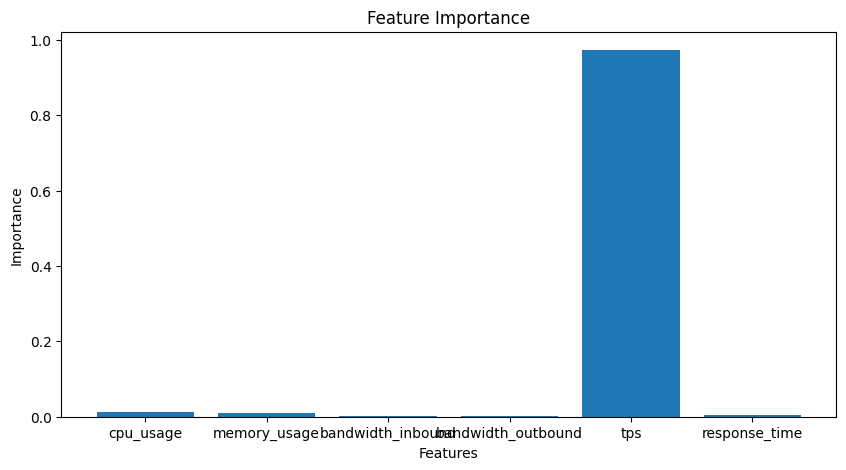

In [8]:
# Create a linear SVM classifier and fit it to the training data
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Get the feature weights
weights = clf.coef_
mean_weights = np.mean(np.abs(weights), axis=0)

visualize_feature_importance(mean_weights, FEATURES)

#### Train Model

In [9]:
# Create and train the model
clf = svm.SVC(C=best_C, kernel='rbf', gamma=best_gamma)
clf.fit(X_train, y_train)

/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1000, gamma=1e-39)

In [10]:
# Predict and print the score
y_pred = clf.predict(X_test)
print_scores(y_test, y_pred)

Accuracy: 0.9045936395759717
Precision: 0.0
Recall: 0.0
F1: 0.0


/Users/nuttchai/dev/rcis/repo/rcie-system-metrics-prediction/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Visualize Result

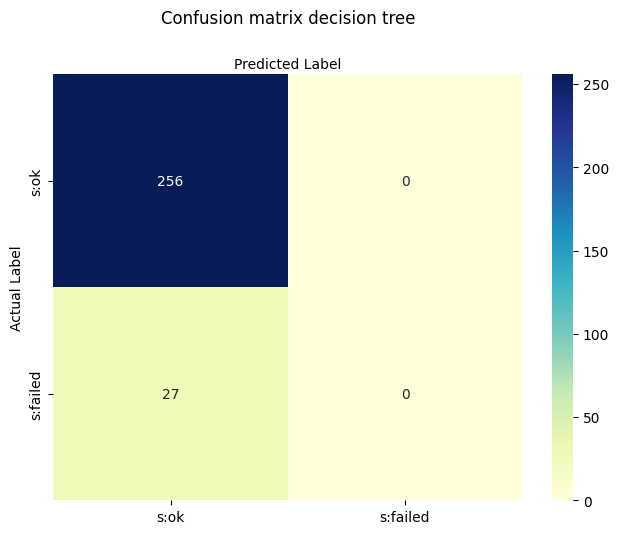

In [11]:
visualize_classification_result(y_test, y_pred)